<font size="6">**Import Libraries**</font>


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import os
import tensorflow as tf

# Suppress TensorFlow INFO and WARNING logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Only errors will be shown
tf.get_logger().setLevel('ERROR')

<font size="6">**Dataset Loading**</font>


In [9]:
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

<font size="6">**Preprocess the Data and Split it into Train and Test sets**</font>


In [10]:

X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

<font size="6">**Build Custom CNN Model**</font>


In [11]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<font size="6">**Model Training**</font>


In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8606 - loss: 0.4450 - val_accuracy: 0.9827 - val_loss: 0.0584
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9742 - loss: 0.0835 - val_accuracy: 0.9873 - val_loss: 0.0446
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0623 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9895 - val_loss: 0.0382
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9879 - loss: 0.0414 - val_accuracy: 0.9903 - val_loss: 0.0396
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9904 - val_loss: 0.0370
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9928 - loss: 0.0230 - 

<font size="6">**Model Evaluation**</font>


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0279
Test accuracy: 0.9926


<font size="6">**Predictions Visualization**</font>


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


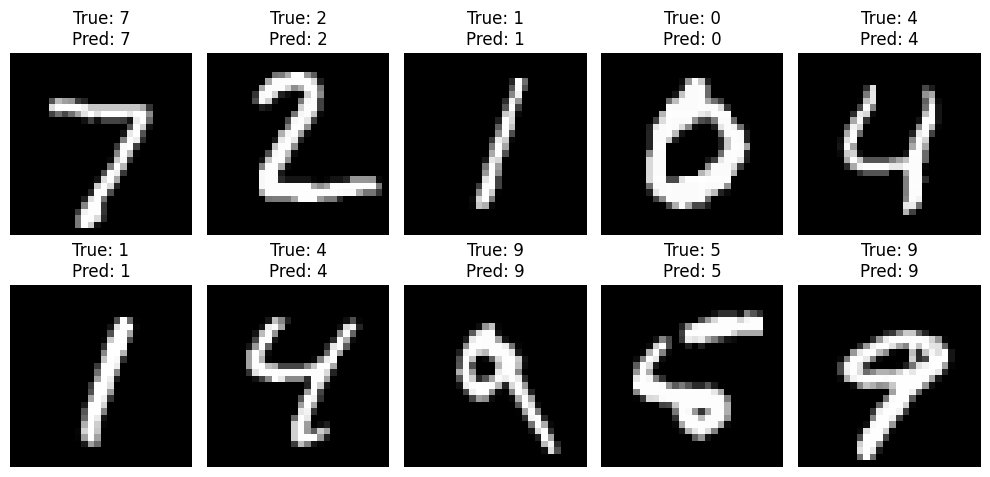

In [14]:
predictions = model.predict(X_test)

def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, predictions)